## Importing modules

In [3]:
import pandas as pd
import numpy as np

# Data types

Sometimes, we want to change the types of data to permit proper analysis. Data may be stored as incorrect types. In this example, 'treatment a' is stored as an object. Text is stored as an object and this looks like numeric values have been stored as text - likely because of the empty value in the first row 

Sex is also stored as object (string). Storing it as category would allow for analysis and also use less memory.

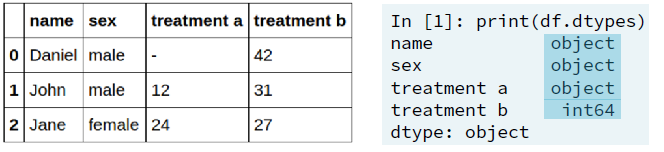



We can change value types using the astype method


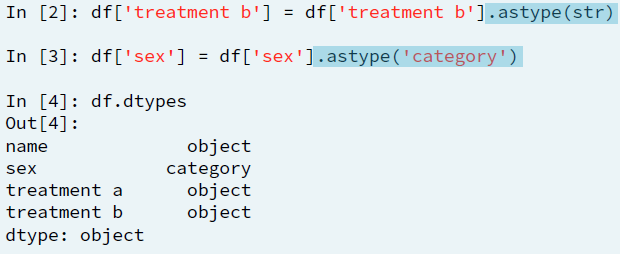

## Converting data types

In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.

The [tips dataset](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) will be used. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of tips.info() in the IPython Shell. You'll note that two columns that should be categorical - sex and smoker - are instead of type object, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.

* [df.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)

In [6]:
# Load the data
tips = pd.read_csv("tips.csv")

# Info before changes
print(tips.info())
print()
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


By converting sex and smoker to categorical variables, the memory usage of the DataFrame went down from 13.4 KB to 10.1KB. This may seem like a small difference here, but when you're dealing with large datasets, the reduction in memory usage can be very significant!

## Working with numeric data

If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the pd.to_numeric() function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.

A modified version of the tips dataset has been pre-loaded into a DataFrame called tips. For instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean. Use the .info() method to explore this. You'll note that the total_bill and tip columns, which should be numeric, are instead of type object. Your job is to fix this.

* [pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)

In [9]:
# Load the bad data
tips_b = pd.read_csv("tips_b.csv")

# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


# Using regular expressions to clean strings

Sometimes we might want to look for properly entered values in a dataset. For example, in the following strings, we might want to skip the last one as it has too many decimal places

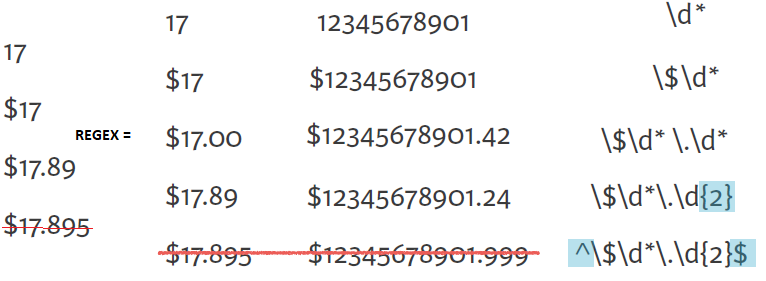

## String parsing with regular expressions

In the video, we saw the basics of regular expressions, which are powerful ways of defining patterns to match strings. This exercise will get you started with writing them.

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

The regular expression module in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

 To use regex, we can use the re.compile() method to turn a regex pattern into a regex object which has the match  and search methods into which the search string can be passed

 Also the builtin bool() function will return False if its argument is false or omitted (i.e. absent, or nonetype),  and True otherwise. It is useful for checking whether a regex returns a result

 In this example we only want to match VALID phone numbers - following the pattern nnn-nnn-nnnn

* [re module](https://docs.python.org/3/library/re.html)
* [re.compile()](https://docs.python.org/3/library/re.html#re.compile)
* [re.match](https://docs.python.org/3/library/re.html#re.regex.match)
* [bool function](https://docs.python.org/3/library/functions.html#bool)

In [10]:
import re

prog = re.compile('\d{3}-\d{3}-\d{4}')
result = prog.match('123-456-7890')
#print(result)
print(bool(result))
print()

result = prog.match('1123-456-7890')
#print(result)
print(bool(result))


True

False


## Extracting numerical values from strings

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

* [re.findall()](https://docs.python.org/3/library/re.html#re.findall)

In [11]:
# How many of each ingredient are needed in this recipe?
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')
print(matches)

['10', '1']


## Pattern matching

In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.

In [12]:
# A telephone number of the format xxx-xxx-xxxx
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# A capital letter, followed by an arbitrary number of alphanumeric characters
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)


True
True
True


# Using functions to clean data

The operation we go through below is a combination of writing the function and using the apply method to apply it to a dataframe series.

Note: The default parameter is axis=0. This applies the function over each row - so essentially it applies it downwards through the column (by performing the operation on every row in the column). If the 'axis=1' argument is added to 'apply' the apply operation is done columnwise rather than rowwise and then applies it across each row. 

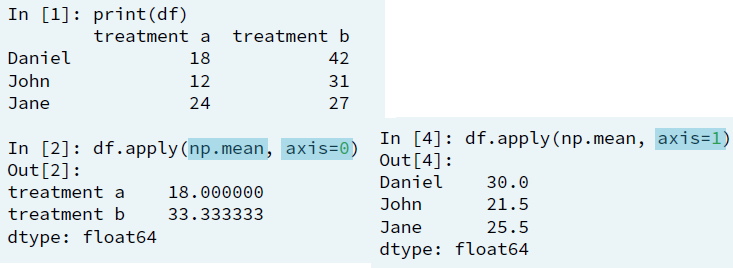

## Custom functions to clean data
The tips dataset relevant to this exercise is tips_c. It has a 'sex' column that contains the values 'Male' or 'Female'. Your job is to write a function that will recode 'Male' to 1, 'Female' to 0, and return np.nan for all entries of 'sex' that are neither 'Male' nor 'Female'.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

As Dan showed you in the videos, you can use the .apply() method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the 'sex' column.

* [df.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

In [14]:
# load the data
tips_c = pd.read_csv("tips_c.csv", index_col=0)

# Define recode_sex()
def recode_sex(sex_value):

    if sex_value == 'Male':
        return 1
    elif sex_value == 'Female':
        return 0   
    else:
        return np.nan

tips_c['sex_recode'] = tips_c['sex'].apply(recode_sex)
tips_c.head()

,day,sex,size,smoker,time,tip,total_bill,total_dollar,sex_recode
0,Sun,Female,2,No,Dinner,1.01,16.99,$16.99,0
1,Sun,Male,3,No,Dinner,1.66,10.34,$10.34,1
2,Sun,Male,3,No,Dinner,3.50,21.01,$21.01,1
3,Sun,Male,2,No,Dinner,3.31,23.68,$23.68,1
4,Sun,Female,4,No,Dinner,3.61,24.59,$24.59,0


## Lambda functions

You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an .apply() method:

    def my_square(x):
        return x ** 2

    df.apply(my_square)

The equivalent code using a lambda function is:

    df.apply(lambda x: x ** 2)

The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called tips. Your job is to clean its 'total_dollar' column by removing the dollar sign. You'll do this using two different methods: With the .replace() method, and with regular expressions. The regular expression module re has been pre-imported.

* [lambda expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)
* [.replace()](https://www.tutorialspoint.com/python/string_replace.htm)

In [16]:
# a lambda function to remove the dollar sign from the 'total_dollar' column of tips_c
tips_c['total_dollar_replace'] = tips_c.total_dollar.apply(lambda x: x.replace('$', ''))

# tips_c['total_dollar_replace'] = tips_c['total_dollar'].apply(lambda x: x.replace('$', '')) would also be 
# correct syntax, but as the column name has no spaces or special characters and is not the name of a function, we can 
# select it directly using dot notation

# Write the lambda function using regular expressions
tips_c['total_dollar_re'] = tips_c.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
tips_c.head()

,Unnamed: 0,day,sex,size,smoker,time,tip,total_bill,total_dollar,sex_recode,total_dollar_replace,total_dollar_re
0,0,Sun,Female,2,No,Dinner,1.01,16.99,$16.99,0,16.99,16.99
1,1,Sun,Male,3,No,Dinner,1.66,10.34,$10.34,1,10.34,10.34
2,2,Sun,Male,3,No,Dinner,3.50,21.01,$21.01,1,21.01,21.01
3,3,Sun,Male,2,No,Dinner,3.31,23.68,$23.68,1,23.68,23.68
4,4,Sun,Female,4,No,Dinner,3.61,24.59,$24.59,0,24.59,24.59


# Duplicate and missing data

## Dropping duplicate data

Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called billboard. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

* [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [16]:
# Load the Data
billboard = pd.read_csv('billboard.csv')

# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

# Print info of tracks
print(tracks.info())
print()
# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
year      1000 non-null int64
artist    1000 non-null object
track     1000 non-null object
time      1000 non-null object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 4 columns):
year      317 non-null int64
artist    317 non-null object
track     317 non-null object
time      317 non-null object
dtypes: int64(1), object(3)
memory usage: 12.4+ KB
None


## Filling missing data

Where there is missing data there are a few options:
* Leave as-is
* Drop these rows
* Fill the missing value

To replace all NaN values with a specified value, you can use fillna, with a specified variable as the argument

Here, you'll return to (a variation on) the airquality dataset from Chapter 2, which has missing values. Explore airquality in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

* [.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [17]:
airquality_b = pd.read_csv("airquality_b.csv")
airquality_b.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,NaN,2.0
2,12.0,149.0,12.6,NaN,5.0,3.0
3,18.0,313.0,NaN,62.0,5.0,NaN
4,NaN,NaN,14.3,56.0,5.0,5.0


In [18]:
airquality_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      115 non-null float64
Solar.R    145 non-null float64
Wind       150 non-null float64
Temp       152 non-null float64
Month      150 non-null float64
Day        152 non-null float64
dtypes: float64(6)
memory usage: 7.2 KB


In [19]:
oz_mean = airquality_b.Ozone.mean()
temp_max = airquality_b.Temp.max()
print('Mean:',oz_mean)
print('Max:',temp_max)

Mean: 42.37391304347826
Max: 97.0


In [20]:
airquality_b['Ozone'] = airquality_b['Ozone'].fillna(oz_mean)
airquality_b['Temp'] = airquality_b['Temp'].fillna(temp_max)
airquality_b['Month'] = airquality_b['Month'].fillna(13)
airquality_b['Day'] = airquality_b['Day'].fillna('Filled_Day')
airquality_b.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.000000,190.0,7.4,67.0,5.0,1
1,36.000000,118.0,8.0,72.0,13.0,2
2,12.000000,149.0,12.6,97.0,5.0,3
3,18.000000,313.0,NaN,62.0,5.0,Filled_Day
4,42.373913,NaN,14.3,56.0,5.0,5


In [21]:
airquality_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    145 non-null float64
Wind       150 non-null float64
Temp       153 non-null float64
Month      153 non-null float64
Day        153 non-null object
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


The null values were filled with the chosen fill parameter and those columns now have no null entries

# Testing with asserts

## Testing your data with asserts

Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.

We can use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull()

* [.all()](https://www.programiz.com/python-programming/methods/built-in/all)
* [.notnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

If we've dropped or filled NaNs we expect no missing values. We can use asserts to check this to detect errors before they happen. Assert does nothing if True but raises an error if false

In [22]:
assert 1 == 1
assert 1== 2

AssertionError: 

In [23]:
google = pd.read_csv("google.csv", index_col=0)
google

,Date,Open,High,Low,Close,Volume,Adj Close
0,09/02/2017,831.729980,NaN,826.500000,830.059998,1192000.0,NaN
1,08/02/2017,830.530029,834.250000,825.109985,829.880005,1300600.0,829.880005
2,07/02/2017,NaN,NaN,823.289978,NaN,1664800.0,NaN
3,06/02/2017,820.919983,822.390015,830.530029,821.629995,NaN,821.619995
4,03/02/2017,NaN,826.130005,819.349976,820.130005,1524400.0,820.130005


Combine this with notnull and all to check entries. notnull is a pandas series method that returns a boolean for each entry in the series  

In [96]:
print(google.Low.notnull())
print()
print(google.Close.notnull())

0    True
1    True
2    True
3    True
4    True
Name: Low, dtype: bool

0     True
1     True
2    False
3     True
4     True
Name: Close, dtype: bool


all() is a built in method that returns true if all items in the iterable to which it is called as a method are true

In [95]:
print(google.Low.notnull().all())    # True because low has no NaN so all its notnull iterables are True
print()
print(google.Close.notnull().all())  # False because some of the Close values are NaN, so the notnull iterable has falses 

True

False


In [109]:
# Notice the syntax in the above was equivalent to 
print(pd.notnull(google['Low']).all())
print()
print(pd.notnull(google['Close']).all())

True

False


Finally, combining assert with these methods allows a value error if there is a NaN in the column

In [25]:
assert google.Low.notnull().all()
assert google.Close.notnull().all()

AssertionError: 

In [24]:
# Trying this all out on a dataset called 'ebola'
ebola = pd.read_csv("ebola.csv", index_col=0)
for col in list(ebola.columns):
    ebola[col] = ebola[col].fillna(0)  # Fill in all NaN's with a 0
ebola.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Calling notnull 
#pd.notnull(ebola).all() #  Equivalent to 
ebola.notnull().all()

Day                    True
Cases_Guinea           True
Cases_Liberia          True
Cases_SierraLeone      True
Cases_Nigeria          True
Cases_Senegal          True
Cases_UnitedStates     True
Cases_Spain            True
Cases_Mali             True
Deaths_Guinea          True
Deaths_Liberia         True
Deaths_SierraLeone     True
Deaths_Nigeria         True
Deaths_Senegal         True
Deaths_UnitedStates    True
Deaths_Spain           True
Deaths_Mali            True
dtype: bool

Notice how this gives 'all' for each of the columns. Previously the all method was done on one single column. When we do it on multiple columns, we need to do it twice. Firstly to call 'all' on each of the columns, which will result in an iterable of booleans for each of the columns, as in the above cell, and secondly to iterate over these booleans.

In [111]:
ebola.notnull().all().all()

True

In [112]:
assert ebola.notnull().all().all()

## Appendix: Methods

__Methods__
* [df.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)
* [pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)
* [re.compile()](https://docs.python.org/3/library/re.html#re.compile)
* [re.match](https://docs.python.org/3/library/re.html#re.regex.match)
* [re.findall()](https://docs.python.org/3/library/re.html#re.findall)
* [df.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [.replace()](https://www.tutorialspoint.com/python/string_replace.htm)
* [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)
* [.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
* [.all()](https://www.programiz.com/python-programming/methods/built-in/all)
* [.notnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

__Functions__
* [bool function](https://docs.python.org/3/library/functions.html#bool)
* [lambda expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)

__Modules__
* [re module](https://docs.python.org/3/library/re.html)